In [1]:
!pip install kaggle

In [8]:
!mkdir C:\Users\Ishan\.kaggle

In [10]:
!dir C:\Users\Ishan\.kaggle

 Volume in drive C is Windows-SSD
 Volume Serial Number is 9617-CB6E

 Directory of C:\Users\Ishan\.kaggle

08/24/2024  09:06 AM    <DIR>          .
08/24/2024  09:06 AM    <DIR>          ..
               0 File(s)              0 bytes
               2 Dir(s)  25,682,264,064 bytes free


In [12]:
!kaggle datasets download -d abdallahalidev/plantvillage-datase

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:00<07:56, 4.59MB/s]
  0%|          | 4.00M/2.04G [00:00<02:46, 13.1MB/s]
  0%|          | 7.00M/2.04G [00:00<02:01, 17.9MB/s]
  0%|          | 9.00M/2.04G [00:00<02:09, 16.9MB/s]
  1%|          | 13.0M/2.04G [00:00<01:39, 21.9MB/s]
  1%|          | 16.0M/2.04G [00:00<01:34, 23.1MB/s]
  1%|          | 19.0M/2.04G [00:00<01:30, 24.1MB/s]
  1%|1         | 22.0M/2.04G [00:01<01:27, 24.9MB/s]
  1%|1         | 25.0M/2.04G [00:01<01:24, 25.6MB/s]
  1%|1         | 28.0M/2.04G [00:01<01:23, 25.8MB/s]
  1%|1         | 31.0M/2.04G [00:01<01:22, 26.1MB/s]
  2%|1         | 34.0M/2.04G [00:01<01:21, 26.4MB/s]
  2%|1         | 37.0M/2.04G [00:01<01:19, 27.1MB/s]
  2%|1         | 40.0M/2.04G [00:01<01:27, 24.7MB/s]
  2%|2         | 43.0M/2.04G [00:01<01:24, 25.4MB/s]
  2%|2         | 46.0M/2.04G [00:02<01:23, 25.6MB/s]
  2%|2         | 49.0M/2.04G [00:02<01:25, 25.1MB/s]
  2%|2         | 52.0M/2.04G [00:02<01:42, 20.9MB/s]
 

In [ ]:
import zipfile
import os

zip_file_path = "plantvillage-dataset.zip"
destination_folder = r"C:\Users\ishan\Desktop"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Files extracted to {destination_folder}")

In [4]:
!pip install tensorflow
#Install and Import Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.data import AUTOTUNE  # For prefetch optimization

# Other necessary imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Cell 2: Load Dataset Path
DATASET_PATH = "C:/Users/ishan/Desktop/plantvillage dataset"
IMG_SIZE = 64
BATCH_SIZE = 16
EPOCHS = 2

if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"Dataset path {DATASET_PATH} does not exist.")
else:
    print(f"Dataset path verified: {DATASET_PATH}")

Dataset path verified: C:/Users/ishan/Desktop/plantvillage dataset


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
IMG_SIZE = 128
BATCH_SIZE = 16

# Preprocess and Load Data using ImageDataGenerator
def load_data(dataset_path, img_size, batch_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_gen = datagen.flow_from_directory(
        dataset_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    val_gen = datagen.flow_from_directory(
        dataset_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_gen, val_gen

# Load the data
train_generator, validation_generator = load_data(DATASET_PATH, IMG_SIZE, BATCH_SIZE)

Found 75957 images belonging to 3 classes.
Found 18987 images belonging to 3 classes.


In [7]:
def generator_to_tfdata(generator):
    dataset = tf.data.Dataset.from_generator(
        lambda: generator,
        output_signature=(
            tf.TensorSpec(shape=(None, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, len(generator.class_indices)), dtype=tf.float32)
        )
    )
    return dataset

# Convert the generators to tf.data.Dataset
train_dataset = generator_to_tfdata(train_generator)
val_dataset = generator_to_tfdata(validation_generator)

# Optimize the dataset pipeline
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
# Cell 5: Build the Model (same as before)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\ishan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Cell 6: Train the Model using the tf.data.Dataset

# Enable mixed precision
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
]

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=callbacks
)

Epoch 1/2
4748/4748 ━━━━━━━━━━━━━━━━━━━━ 577s 117ms/step - accuracy: 0.9731 - loss: 0.0877 - val_accuracy: 0.9998 - val_loss: 6.9607e-04
Epoch 2/2
4748/4748 ━━━━━━━━━━━━━━━━━━━━ 527s 111ms/step - accuracy: 0.9953 - loss: 0.0214 - val_accuracy: 0.9999 - val_loss: 4.9805e-04


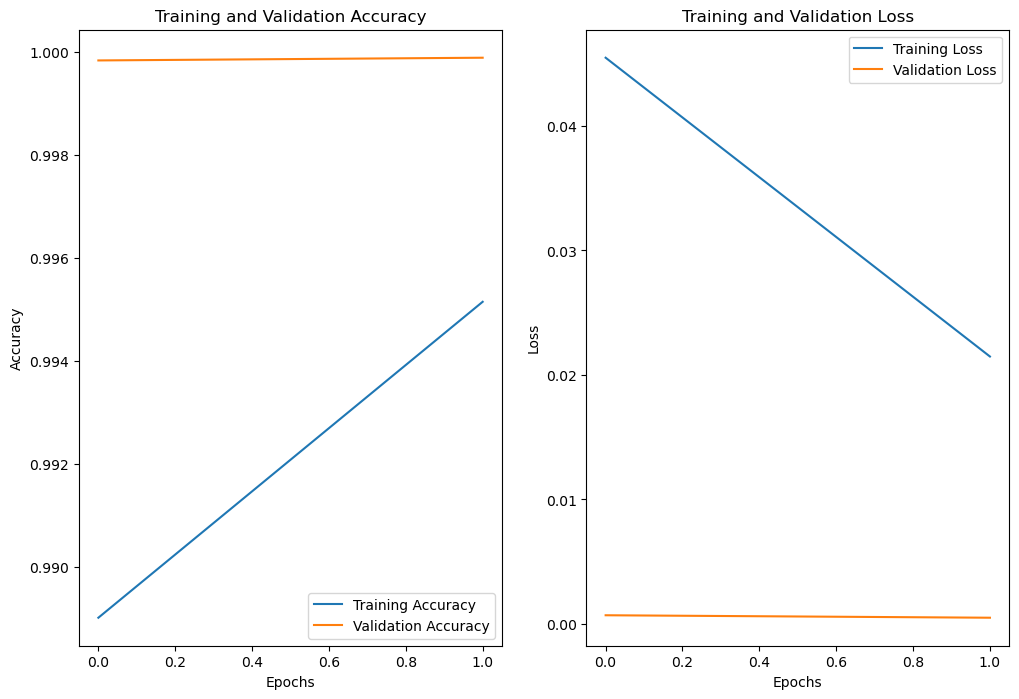

In [10]:
# Cell 7: Plot Accuracy and Loss 
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# Save the model in the recommended native Keras format
model.save("final_plant_disease_model.keras")

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model in the native Keras format
loaded_model = load_model(r"C:\Users\ishan\Desktop\final_plant_disease_model.keras")

# Define the path to the plant image
img_path = r"C:\Users\ishan\Desktop\tomato-leaf.jpg"  # Replace with your image file

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, img_size):
    img = image.load_img(img_path, target_size=(img_size, img_size))  # Resize the image
    img_array = image.img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Preprocess the image
img_array = load_and_preprocess_image(img_path, 128)  # Assuming 128x128 input size

# Use the loaded model for prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Assuming 'Healthy' and 'Not Healthy' are your classes
class_names = ['Healthy', 'Not Healthy']  # Adjust according to your actual classes
print(f"Predicted class from loaded model: {class_names[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class from loaded model: Healthy
